In [ ]:
#Import first lib
import yfinance as yf
import pandas as pd

In [ ]:
#Define Ticker and Date Range
%matplotlib inline

ticker = 'AMD'
start_date = '2015-01-01'
end_date = '2023-12-31'

In [ ]:
#Fetch data from Yfinance
stock_data = yf.download(ticker, start=start_date, end=end_date)
stock_data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,2.67,2.67,2.67,2.67,2.67,0
2015-01-05,2.67,2.70,2.64,2.66,2.66,8878200
2015-01-06,2.65,2.66,2.55,2.63,2.63,13912500
2015-01-07,2.63,2.65,2.54,2.58,2.58,12377600
2015-01-08,2.59,2.65,2.56,2.61,2.61,11136600


<function matplotlib.pyplot.show(close=None, block=None)>

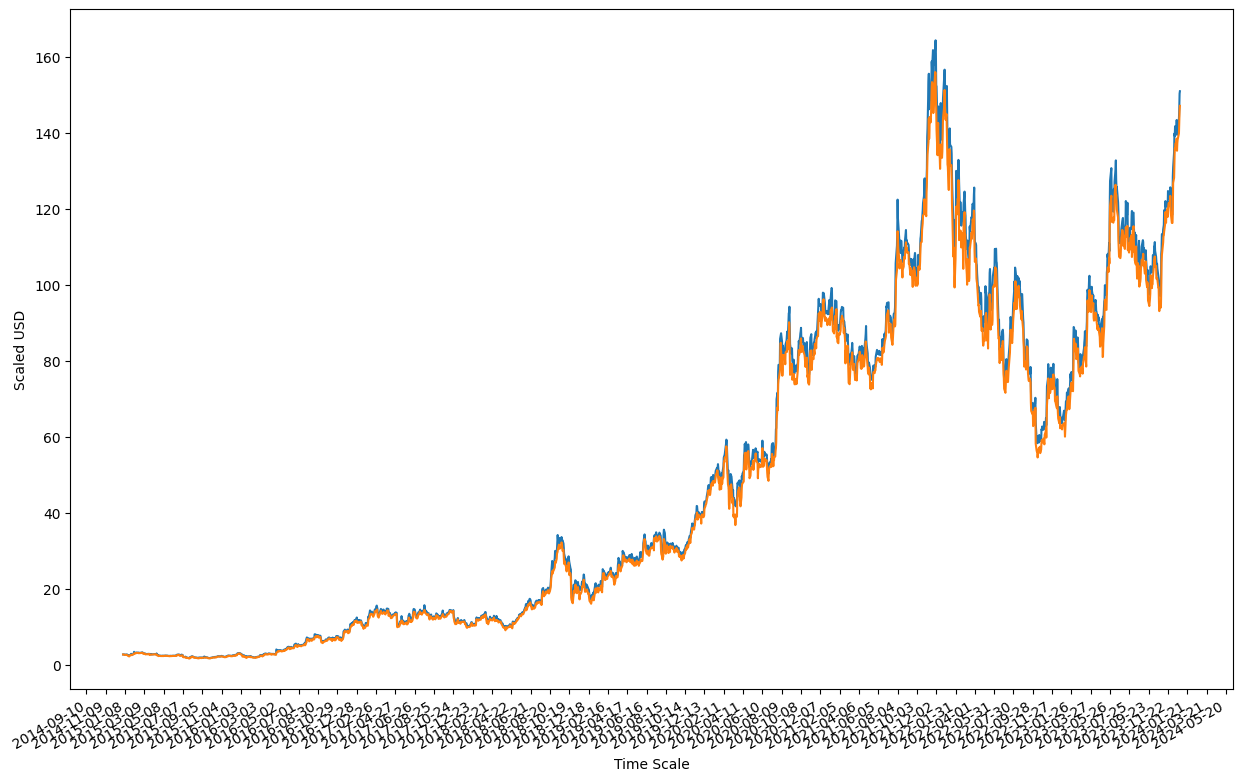

In [ ]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import datetime as dt

plt.figure(figsize=(15,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=60))

x_dates = stock_data.index

plt.plot(x_dates, stock_data['High'], label = 'High')
plt.plot(x_dates, stock_data['Low'], label = 'Low')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend
plt.gcf().autofmt_xdate()
plt.show

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import load_model

In [ ]:
#Prepare Data for LSTM
target_y = stock_data['Close']
X_feat = stock_data.iloc[:,0:3]

In [ ]:
#Rescaling Value
sc = StandardScaler()
X_ft = sc.fit_transform(X_feat.values)
X_ft = pd.DataFrame(columns = X_feat.columns,
                    data = X_ft,
                    index = X_feat.index)

In [ ]:
def lstm_split(data, n_steps):
  X, y = [], []
  for i in range(len(data)-n_steps):
    X.append(data[i:i + n_steps, :])
    y.append(data[i + n_steps, -1])

  return np.array(X), np.array(y)

In [ ]:
n_steps = 10
X1, y1 = lstm_split(X_ft.values, n_steps)

In [ ]:
# Split the data into training and testing sets
train_size = int(len(X_ft) * 0.8)
test_size = len(X_ft) - train_size
X_train, X_test = X1[:train_size], X1[train_size:]
y_train, y_test = y1[:train_size], y1[train_size:]

# Ensure the shapes of X_train, X_test, y_train, and y_test are correct
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(1811, 10, 3) (443, 10, 3) (1811,) (443,)


In [ ]:
#Define LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(n_steps, X_train.shape[2]),
              activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
lstm.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                4608      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 4641 (18.13 KB)
Trainable params: 4641 (18.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history=lstm.fit(X_train, y_train,
                 epochs=100, batch_size=16,
                 verbose=2, shuffle=False)

Epoch 1/100
114/114 - 2s - loss: 0.3330 - 2s/epoch - 18ms/step
Epoch 2/100
114/114 - 1s - loss: 0.1045 - 724ms/epoch - 6ms/step
Epoch 3/100
114/114 - 1s - loss: 0.0131 - 849ms/epoch - 7ms/step
Epoch 4/100
114/114 - 1s - loss: 0.0243 - 1s/epoch - 11ms/step
Epoch 5/100
114/114 - 1s - loss: 0.0081 - 1s/epoch - 10ms/step
Epoch 6/100
114/114 - 1s - loss: 0.0107 - 894ms/epoch - 8ms/step
Epoch 7/100
114/114 - 1s - loss: 0.0051 - 810ms/epoch - 7ms/step
Epoch 8/100
114/114 - 1s - loss: 0.0052 - 779ms/epoch - 7ms/step
Epoch 9/100
114/114 - 1s - loss: 0.0046 - 873ms/epoch - 8ms/step
Epoch 10/100
114/114 - 1s - loss: 0.0046 - 921ms/epoch - 8ms/step
Epoch 11/100
114/114 - 1s - loss: 0.0049 - 859ms/epoch - 8ms/step
Epoch 12/100
114/114 - 1s - loss: 0.0041 - 762ms/epoch - 7ms/step
Epoch 13/100
114/114 - 1s - loss: 0.0033 - 1s/epoch - 9ms/step
Epoch 14/100
114/114 - 1s - loss: 0.0033 - 901ms/epoch - 8ms/step
Epoch 15/100
114/114 - 1s - loss: 0.0037 - 830ms/epoch - 7ms/step
Epoch 16/100
114/114 - 1s - 

In [ ]:
y_pred = lstm.predict(X_test)

14/14 [==============================] - 0s 2ms/step


In [ ]:
# Flatten y_test and y_pred
y_test_flat = y_test
y_pred_flat = y_pred.flatten()

In [ ]:
# Calculate metrics
rmse = mean_squared_error(y_test_flat, y_pred_flat, squared=False)
mape = mean_absolute_percentage_error(y_test_flat, y_pred_flat)

print("RMSE:", rmse)
print("MAPE:", mape)

RMSE: 0.15351954860793676
MAPE: 0.18005168781146738


In [ ]:
#Save Model
lstm.save('lstm_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#Save model training history
history_df = pd.DataFrame(history.history)
history_df.to_csv('training_history.csv', index = False)

In [ ]:
print("Model and training history saved succesfully.")

Model and training history saved succesfully.


In [ ]:
# Load the model
loaded_model = load_model('lstm_model.h5')

In [ ]:
#Read history of training
history_df = pd.read_csv('training_history.csv')
print(history_df.head())

       loss
0  0.333000
1  0.104482
2  0.013117
3  0.024320
4  0.008124
